# Regularization
On this notebook we will see a problem of overfitting and we will deal wit it adding two kinds of regularization strategies: l2 weight decay on the parameters and dropout. 

## The dataset
Dataset is generated with a sklearn function. It consists on some concentric circles with a random noise:


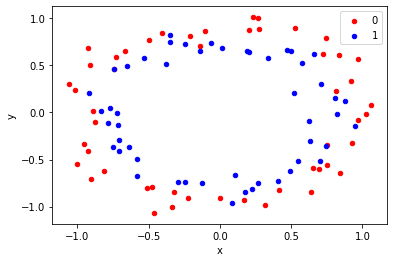

In [1]:
# generate two circles dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import pandas as pd
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

<font color=red><b>Generate the dataset. Use 100 samples and noise = 0.1. Place a random state. Create a train and test sets. The train must contain only 30% of the samples.

</font>

In [2]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## Building the model

We will use a very basic model architecture. In this case it will be:
- Dense 500, relu activated
- Dense quth single unit. sigmoid activated
- use binary crossentropy as the loss function and adam as the optimizer. Add accuracy as the metric.

<font color=red><b>Build the model and train it

</font>

In [3]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session() 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.771


### Overfitting?
Let's see if the model overfits:

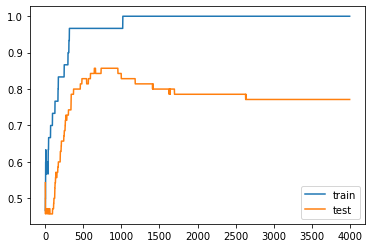

In [4]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

<font color=red><b>PLot the losses for both valid and train

</font>

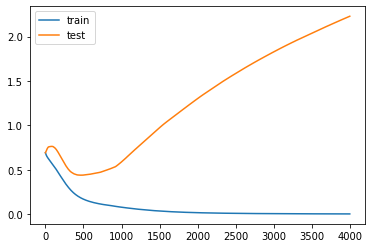

In [5]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Weight Decay regularization
We will use the L2 vector norm also called weight decay with a regularization parameter They are based on the next formulas, which are equivalent:

$$\mathcal{J}(W; X, y) + \frac{1}{2}\cdot\lambda\cdot ||W||^2$$

$$\omega_{t+1} = \omega_t -\alpha\cdot\nabla_{\omega}J - \lambda\cdot \omega_t$$

<font color=red><b>Build the same model structure, but add a l2 kernel regularizer on the big dense layer. Use an arbitrary 0.001 value for lambda

</font>

In [6]:
from tensorflow.keras.regularizers import l2
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(trainX, trainy, epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.800


Let's check more than one lambda this time:

<font color=red><b>Build a grid search structure to train models at each lambda value. Include accuracies in a list

</font>

In [7]:
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=4000, verbose=0)
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)

Param: 0.100000, Train: 0.900, Test: 0.729
Param: 0.010000, Train: 0.967, Test: 0.800
Param: 0.001000, Train: 1.000, Test: 0.786
Param: 0.000100, Train: 1.000, Test: 0.757
Param: 0.000010, Train: 1.000, Test: 0.771
Param: 0.000001, Train: 1.000, Test: 0.757


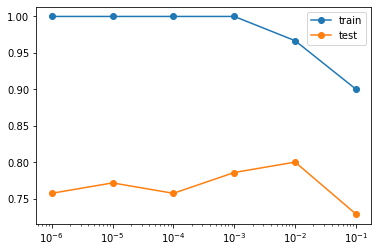

In [8]:
# plot train and test means
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend()
plt.show()

## Dropout
Let's try another source of regularization: Dropout. It consists on randomly removing some neurons from the previous layer at training time


<font color=red><b>Add a dropout of 0.4 to the big dense layer.

</font>

In [9]:
from tensorflow.keras.layers import Dropout
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.786


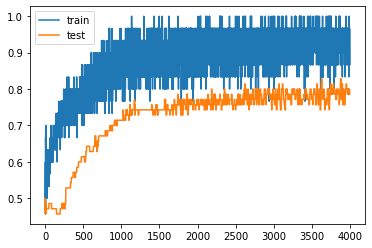

In [10]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

<font color=red><b>PLot the losses for both valid and train

</font>

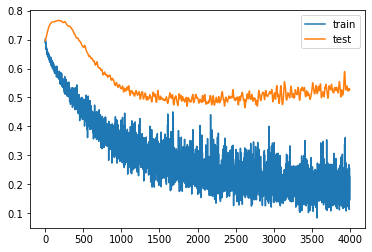

In [11]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()